In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution

In [2]:
def forwardstart(Epam, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(Epam)
        el.append(Epam)
        el.append(Epam)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Ew)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
    return win_prob_r1

In [3]:
def reversestart(Epam, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(-Ec)
        el.append(-Ew)
        for i in range(region[0], region[1]):
            if i == region[1]-j-1:
                el.append(-Emm)
            else:
                el.append(-Ec)
        el.append(-Epam)
        el.append(-Epam)
        el.append(-Epam)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][0][1])
        
    return win_prob_r1

In [4]:
def forward(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(Estart)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Ew)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
    return win_prob_r1

In [5]:
def reverse(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(-Estart)
        el.append(-Ew)
        for i in range(region[0], region[1]):
            if i == region[1]-j-1:
                el.append(-Emm)
            else:
                el.append(-Ec)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][0][1])
        
    return win_prob_r1

In [6]:
def cut(Estart, Ec, region, totlen, Emm, Ecut, Estop):
    els = []
    for j in range(totlen):
        el = []
        el.append(Ec)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Estop)
        els.append(el)
    plsm = []
    for j in range(len(els)):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for i in range(len(els[j])-1):
            p = []
            z = 1 + np.exp(-els[j][i])+np.exp(els[j][i+1])
            p.append((1/(1+np.exp(Ecut))*np.exp(-els[j][i])/z))
            p.append((1/(1+np.exp(Ecut))*1/z))
            p.append((1/(1+np.exp(Ecut))*np.exp(els[j][i+1])/z))
            pls.append(p)
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)
    matrix_m = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            if i == len(plsm[j])-3:
                pcut = np.exp(Ecut)/(1+np.exp(Ecut))
                line.append(0)
                for l in range(len(plsm[j])-4):
                    line.append(pcut)
                line.append(1)
                matrix.append(line)
            else:
                for k in range(len(plsm[j])-2):
                    if k == i - 1:
                        line.append(plsm[j][k+1][2])
                    elif k == i:
                        line.append(plsm[j][k+1][1])
                    elif k == i + 1:
                        line.append(plsm[j][k+1][0])
                    else:
                        line.append(0)
                matrix.append(line)
        matrix_m.append(matrix)
    matrix_m = np.array(matrix_m)
    powered_matrix_array = []
    for j in range(len(matrix_m)):
        powered_matrix_array.append(LA.matrix_power(matrix_m[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [7]:
def cutrate(Estart, Epam, Ec, Ew1, Ew2, Emm, Ecut, stop1, stop2):
    totlen = 20
    region1 = [0, int(stop1)]
    region2 = [int(stop1), int(stop2)]
    region3 = [int(stop2), totlen]
    Estop = -1000000
    probs = [forwardstart(Epam, Ec, Ew1, region1, totlen, Emm), reversestart(Epam, Ec, Ew1, region1, totlen, Emm),
             forward(Ec, Ec, Ew2, region2, totlen, Emm), reverse(Ec, Ec, Ew2, region2, totlen, Emm),
        cut(Ec, Ec, region3, totlen, Emm, Ecut, Estop)]
    plsm = []
    for i in range(len(probs[0])):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for j in range(len(probs)):
            pls.append([1-probs[j][i], 0, probs[j][i]])
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)

    matrix_array = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            for k in range(len(plsm[j])-2):
                if k == i - 1:
                    line.append(plsm[j][k+1][2])
                elif k == i:
                    line.append(plsm[j][k+1][1])
                elif k == i + 1:
                    line.append(plsm[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)

    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 20000))

    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [8]:
data_VCP2_Cas9 = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             [0.02, 0.05, 0.01, 0, 0, 0, 0.02, 0, 0, 0.03, 0.16, 0.62, 0.49, 0.68, 0.72, 0.58, 0.87, 0.94, 0.91, 1.09], 
             [0, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0.01, 0.03, 0.12, 0.04, 0, 0.02, 0.04, 0.04, 0.04, 0.05, 0.03]]

Estart = 8
Ec = 0.83
Ew = -7
Emm = -8.3
Ecut = -20
stop = 15

In [9]:
x = [Estart, Ec, Ew, Emm, Ecut, stop]
bounds = [(1, 8), (1,2), (1, 2), (-5, -15), (-5, -15), (-5, -12), (-5, -10), (8, 11), (15.7,16.3)]

In [10]:
def minimizee(x):
    data_VCP2_Cas9 = [0.02, 0.05, 0.01, 0, 0, 0, 0.02, 0, 0, 0.03, 0.16, 0.62, 0.49, 0.68, 0.72, 0.58, 0.87, 0.94, 0.91, 1.09]
    pick = [0,1,2, 3, 4,5,6,7,8,9, 10,11,12,13,14,15,16,17,18,19]
    fit_probs = np.take(cutrate(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8]),
                        pick)
    return np.sum(np.square(np.subtract(data_VCP2_Cas9, fit_probs)))

In [11]:
#Fitting
result = differential_evolution(func = minimizee, bounds = bounds, maxiter = 200, popsize = 20)

In [12]:
new_x = result.x

In [16]:
new_x = [3.86200298,   1.97615731,   1.37604725, -10.78843177,
       -10.46460531,  -7.55521697,  -9.14979501,   8.0624071 ,
        16.16372459]

In [17]:
full_length = cutrate(10, new_x[1], new_x[2], new_x[3], new_x[4], new_x[5], new_x[6], new_x[7], new_x[8])
x = np.arange(1, 30, 1)

In [18]:
data_VCP2_Cas9 = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             [0.02, 0.05, 0.01, 0, 0, 0, 0.02, 0, 0, 0.03, 0.16, 0.62, 0.49, 0.68, 0.72, 0.58, 0.87, 0.94, 0.91, 1.09], 
             [0, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0.01, 0.03, 0.12, 0.04, 0, 0.02, 0.04, 0.04, 0.04, 0.05, 0.03]]

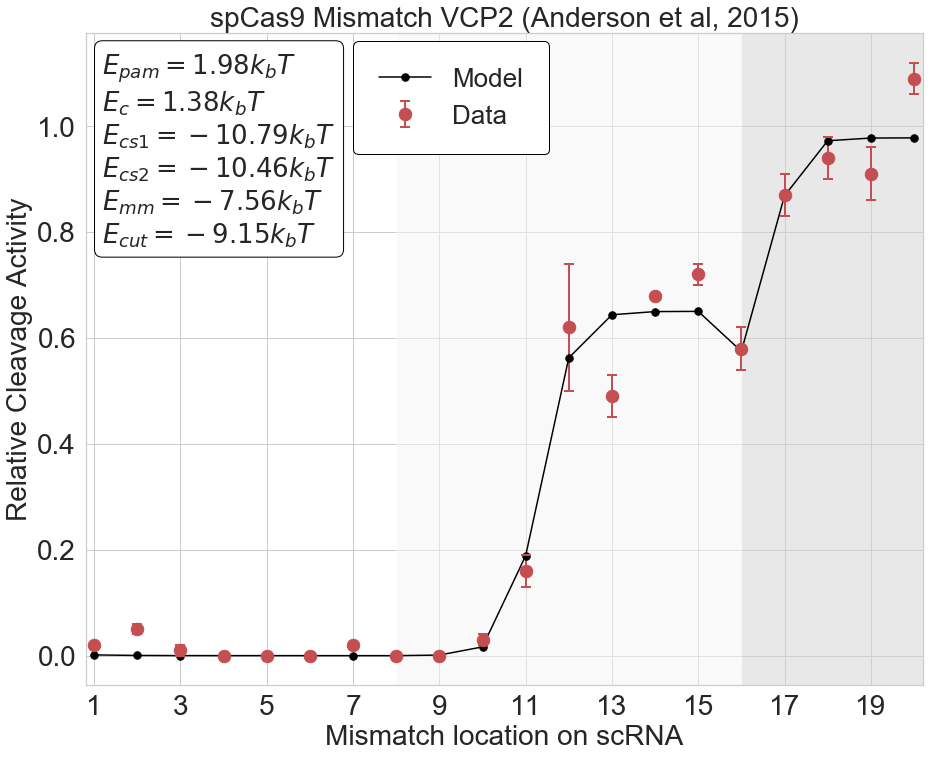

In [20]:
ax = plt.axes()
plt.plot(x[:20], full_length[:20], lw = 1.5, c = 'black', label = 'Model', marker = '.', ms = '15')
color1 = 'r'
plt.errorbar(data_VCP2_Cas9[0], data_VCP2_Cas9[1], data_VCP2_Cas9[2], fmt = '.', 
             ecolor = color1, capsize = 5, elinewidth = 2,
             capthick = 2, color = color1, ms = '25', label = 'Data')
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax.set_title('spCas9 Mismatch VCP2 (Anderson et al, 2015)', fontsize = 28)
plt.ylabel('Relative Cleavage Activity', fontsize = 28)
plt.xlabel('Mismatch location on scRNA', fontsize = 28)
plt.xlim(0.8, 20.2)
plt.axvspan(8, 16, facecolor='whitesmoke', alpha=0.5)
plt.axvspan(16, 22, facecolor='lightgrey', alpha=0.5)
plt.xticks(np.arange(1, 20, 2), fontsize = 28)
plt.yticks(fontsize = 28)
plt.rcParams["figure.figsize"] = (15, 12)
plt.legend(loc=[0.32, 0.814], fancybox =True, borderpad = 1, edgecolor = 'black', fontsize = 26, framealpha = 1)
props = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor = 'black')
textstr = '\n'.join((
    r'$E_{pam}=%.2f$' % (new_x[1], ) + '$k_bT$',
    r'$E_{c}=%.2f$' % (new_x[2], ) + '$k_bT$',
    r'$E_{cs1}=%.2f$' % (new_x[3], ) + '$k_bT$', r'$E_{cs2}=%.2f$' % (new_x[4], ) + '$k_bT$', 
    r'$E_{mm}=%.2f$' % (new_x[5], ) + '$k_bT$', r'$E_{cut}=%.2f$' % (new_x[6], ) + '$k_bT$'))
ax.text(0.02, 0.97, textstr, transform=ax.transAxes, fontsize=26,
        verticalalignment='top', bbox=props )
plt.show()